<a href="https://colab.research.google.com/github/nidhid707/cupcake/blob/master/stock_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#dropdown = 'AXISBANK.NS' #@param ["^NSEI", "AXISBANK.NS","BANKBARODA.NS","ASHOKLEY.NS","BHARTIARTL.NS","BPCL.NS","CIPLA.NS","HCLTECH.NS","HDFC.NS","HDFCBANK.NS","HEXAWARE.NS","HINDALCO.NS","HINDUNILVR.NS","ICICIBANK.NS","INFY","ITC.NS","JETAIRWAYS.NS","LT.NS","MARUTI.NS","^NSEBANK","ONGC.NS","PFC.NS","PNB.NS","RELIANCE.NS","SBIN.NS","TATAMOTORS.NS","TATASTEEL.NS","TCS.NS","TECHM.NS","TVSMOTOR.NS","WIPRO.NS","YESBANK.NS"]


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf /content/ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib 
import talib

--2020-06-18 05:13:59--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-06-18 05:13:59--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-06-18 05:13:59--  https://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving iweb.dl.sourceforge.ne

In [ ]:
import random , os
import multiprocessing as mp
from queue import Empty
import math
import time

In [ ]:
p=mp.Pool(4)

In [ ]:
!pip install yfinance
import yfinance as yf
nsedata = yf.Ticker("^NSEI")

# get stock info
#nsedata.info

# get historical market data
nifty = nsedata.history(period="6y")
#nifty["h_o"]=(nifty["High"]-nifty["Close"])/nifty["Close"]*100
#nifty["pct_chg"]=(nifty["Close"]-nifty["Open"])/nifty["Open"]*100
nifty.head()
nifty.tail()


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=4679bf188ec4fd84b26e59ff93d5996bd200b536eda5c939cc42dda1947c1ac5
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


JSONDecodeError: ignored

In [ ]:
#tprice=nifty.tail(300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=4, units=4, kernel_initializer="uniform")`


Train on 808 samples, validate on 347 samples
Epoch 1/50
808/808 [==============================] - 2s 2ms/step - loss: 0.0556 - accuracy: 0.3490 - val_loss: 0.0936 - val_accuracy: 0.3343
Epoch 2/50
808/808 [==============================] - 0s 338us/step - loss: 0.0470 - accuracy: 0.4579 - val_loss: 0.1715 - val_accuracy: 0.3343
Epoch 3/50
808/808 [==============================] - 0s 327us/step - loss: 0.0283 - accuracy: 0.5433 - val_loss: 0.2742 - val_accuracy: 0.3343
Epoch 4/50
808/808 [==============================] - 0s 344us/step - loss: 0.0235 - accuracy: 0.5656 - val_loss: 0.2157 - val_accuracy: 0.3343
Epoch 5/50
808/808 [==============================] - 0s 331us/step - loss: 0.0232 - accuracy: 0.5755 - val_loss: 0.2338 - val_accuracy: 0.3343
Epoch 6/50
808/808 [==============================] - 0s 336us/step - loss: 0.0222 - accuracy: 0.5606 - val_loss: 0.2192 - val_accuracy: 0.3343
Epoch 7/50
808/808 [==============================] - 0s 336us/step - loss: 0.0222 - accurac

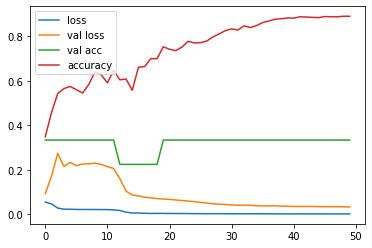

In [ ]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime,date,timedelta
#from nsepy import get_history
from talib import RSI, BBANDS,ADX,MINUS_DI,PLUS_DI
#from pandas_datareader import data as pdr
import random

random.seed(9001)
#nifty=nifty.head(-5)

#nifty = get_history(symbol="NIFTY 50",
 #                       start=date(2015,1,1),
  #                      end=date.today(),
   #                     index=True)

#nifty["next_Price"]=nifty["Open"].shift(-1)
# Importing the training set

og=nifty.tail(300)

dataset_train = nifty.head(-305)

training_set=dataset_train.iloc[:,0:4].values
#training_set=training_set.dropna().values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(5, dataset_train.shape[0]):
    X_train.append(training_set_scaled[i-5:i, 0:4])
    y_train.append(training_set_scaled[i, 0:4])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 4))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Bidirectional
from keras.layers import Dropout
import keras
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 4))))
regressor.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 4))))
regressor.add(Dropout(0.5))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 4))))
regressor.add(Dropout(0.5))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(Bidirectional(LSTM(units = 50, input_shape = (X_train.shape[1], 4))))
regressor.add(Dropout(0.5))

# Adding the output layer
regressor.add(Dense(output_dim = 4, init = 'uniform', activation = 'sigmoid',input_dim=4))

# Compiling the RNN
regressor.compile(optimizer = "adam", loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
history=regressor.fit(X_train, y_train, epochs = 50, batch_size = 60, validation_split=0.3,shuffle=True)

# Part 3 - Making the predictions and visualising the results
#################################


from matplotlib import pyplot


pyplot.plot(history.history['loss'],label="loss")
pyplot.plot(history.history['val_loss'],label="val loss")
pyplot.plot(history.history['val_accuracy'],label="val acc")
pyplot.plot(history.history['accuracy'],label="accuracy")
pyplot.legend()

#######################


In [ ]:

# Getting the real stock price of 2017
dataset_test = nifty.tail(305)
#dataset_test=dataset_test.head(6)
#real_stock_price = dataset_test.iloc[:, 0:1].values

# Getting the predicted stock price of 2017
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
#inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values
inputs=dataset_test.iloc[:, 0:4].values
inputs = inputs.reshape(-1,4)
inputs = sc.transform(inputs)
X_test=[]
for i in range(5, dataset_test.shape[0]):
    X_test.append(inputs[i-5:i, 0:4])
  #  y_train.append(inputs[i, 0:4])

X_test = np.array(X_test)
X_test = np.reshape(X_test,  (X_test.shape[0], X_test.shape[1], 4))



predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


def get_technical_indicators(dataset):
    # Create 20 and 100 days Moving Average
    dataset['ma20'] = dataset['Close'].rolling(window=20).mean()
    dataset['ma100'] = dataset['Close'].rolling(window=100).mean()
    
    # Create MACD
    dataset['12ema'] =pd.DataFrame.ewm(dataset['Close'], span=12).mean()
    dataset['26ema'] = pd.DataFrame.ewm(dataset['Close'], span=26).mean()
    dataset['MACD'] = (dataset['26ema']-dataset['12ema'])
    dataset['MACD_ema']=pd.DataFrame.ewm(dataset['MACD'], span=7).mean() #signal line
# Create Bollinger Bands
    dataset['20sd'] = dataset['Close'].rolling(window=20).std()
    dataset['upper_band'] = dataset['ma100'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma100'] - (dataset['20sd']*2)
#up, mid, low = BBANDS(nifty["Open"], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    dataset["ADX"]=ADX(dataset["High"],dataset["Low"],dataset["Close"],7)
    dataset["minus_di"]=MINUS_DI(dataset["High"],dataset["Low"],dataset["Close"], timeperiod=7)
    dataset["plus_di"]=PLUS_DI(dataset["High"],dataset["Low"],dataset["Close"], timeperiod=7)
    # Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Close']-1
    dataset["rsi"] = RSI(dataset["Close"], timeperiod=7) #20-60
    return dataset
#sdata=get_technical_indicators(sprice.tail(200))
###################################
from datetime import date
import pandas as pd

if (nifty.tail(1).index.weekday)==4:
  fdt=nifty.tail(1).index+ pd.to_timedelta(3, unit='D')
else:
  fdt=nifty.tail(1).index+ pd.to_timedelta(1, unit='D')
  

sprice=pd.DataFrame(index=[nifty.tail(299).index.append(fdt)])
o=[]
for i in range(0,300):
  o.append(predicted_stock_price[i][0])
o

#################
h=[]
for i in range(0,300):
  h.append(predicted_stock_price[i][1])
h
####################
l=[]
for i in range(0,300):
  l.append(predicted_stock_price[i][2])
l
##################
c=[]
for i in range(0,300):
  c.append(predicted_stock_price[i][3])
c
#########################

sprice["Open"]=o
sprice["High"]=h
sprice["Low"]=l
sprice["Close"]=c

#sprice=pd.DataFrame(nifty.iloc[:,0:4].tail(200))
#sprice=pd.DataFrame(sprice.append(tprice))
sprice=get_technical_indicators(sprice)


#################################

sprice["macd_Signal"]=np.where(sprice["MACD"]>sprice["MACD_ema"], "Buy", "Sell")


sprice["rsi_Signal"]=np.where(sprice["rsi"]<30, "Buy", np.where(sprice["rsi"]>70, "Sell", "Hold"))


#sprice["bb_Signal"]=np.where(sprice["lower_band"]>sprice["ma20"], "Buy", np.where(sprice["upper_band"]<sprice["ma20"], "Sell", "Hold"))

sprice["adx_Signal"]=np.where(( (sprice["plus_di"]>sprice["minus_di"]) &( sprice["ADX"]>20)), "Sell",
                             np.where(( (sprice["plus_di"]<sprice["minus_di"]) & (sprice["ADX"]>20)), "Buy", "Hold"))


                
sprice["Signal"]=np.where((sprice["adx_Signal"]==sprice["rsi_Signal"])&(sprice["adx_Signal"]=="Sell"), "Sell",
                                            np.where((sprice["adx_Signal"]==sprice["macd_Signal"])&(sprice["macd_Signal"]=="Sell"), "Sell",
                                   np.where((sprice["adx_Signal"]==sprice["rsi_Signal"])&(sprice["adx_Signal"]=="Buy"), "Buy",
                                            np.where((sprice["adx_Signal"]==sprice["macd_Signal"])&(sprice["macd_Signal"]=="Buy"), "Buy",
                                            "Hold"))))


sprice["Signal"]= np.where((sprice["adx_Signal"]==sprice["macd_Signal"])&(sprice["adx_Signal"]==sprice["rsi_Signal"])&(sprice["adx_Signal"]=="Sell"), "Strong Sell",
                          np.where((sprice["adx_Signal"]==sprice["macd_Signal"])&(sprice["adx_Signal"]==sprice["rsi_Signal"])&(sprice["adx_Signal"]=="Buy"), "Strong Buy",
                                            "Hold"))

###########################################



sdata=sprice[["Open","Close","macd_Signal","rsi_Signal","adx_Signal","Signal"]]
print(sdata)
sdata.tail(365).to_csv("result.csv")




                   Open        Close  ... adx_Signal       Signal
Date                                  ...                        
2019-03-26  9936.575195  9926.725586  ...       Hold         Hold
2019-03-27  9936.987305  9927.149414  ...       Hold         Hold
2019-03-28  9937.254883  9927.423828  ...       Hold         Hold
2019-04-01  9937.312500  9927.481445  ...       Hold         Hold
2019-04-02  9936.868164  9927.024414  ...       Hold         Hold
...                 ...          ...  ...        ...          ...
2020-06-15  9902.489258  9891.588867  ...       Sell  Strong Sell
2020-06-16  9902.476562  9891.530273  ...       Sell  Strong Sell
2020-06-17  9894.108398  9882.868164  ...       Sell  Strong Sell
2020-06-18  9884.211914  9872.635742  ...       Sell  Strong Sell
2020-06-19  9870.005859  9858.033203  ...       Sell  Strong Sell

[300 rows x 6 columns]


In [ ]:
sdata["P_Signal"]=sdata["Signal"].shift(1)
sdata["Options"]=np.where((sdata["Signal"]=="Hold")&(sdata["P_Signal"]=="Strong Sell"),"Put",np.where((sdata["Signal"]=="Hold")&(sdata["P_Signal"]=="Strong Buy"),"Call","hold"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sdata.tail(365).to_csv("result.csv")
sdata

,Open,Close,macd_Signal,rsi_Signal,adx_Signal,Signal,P_Signal,Options
Date,,,,,,,,
2019-03-26,9936.575195,9926.725586,Sell,Hold,Hold,Hold,NaN,hold
2019-03-27,9936.987305,9927.149414,Sell,Hold,Hold,Hold,Hold,hold
2019-03-28,9937.254883,9927.423828,Sell,Hold,Hold,Hold,Hold,hold
2019-04-01,9937.312500,9927.481445,Sell,Hold,Hold,Hold,Hold,hold
2019-04-02,9936.868164,9927.024414,Buy,Hold,Hold,Hold,Hold,hold
...,...,...,...,...,...,...,...,...
2020-06-15,9902.489258,9891.588867,Sell,Sell,Sell,Strong Sell,Strong Sell,hold
2020-06-16,9902.476562,9891.530273,Sell,Sell,Sell,Strong Sell,Strong Sell,hold
2020-06-17,9894.108398,9882.868164,Sell,Sell,Sell,Strong Sell,Strong Sell,hold


In [ ]:


oprice=og.iloc[:,0:4]
#oprice=pd.DataFrame(nifty.iloc[:,0:4].tail(200))
#oprice=pd.DataFrame(oprice.append(tprice))
oprice=get_technical_indicators(oprice)


#################################

oprice["macd_Signal"]=np.where(oprice["MACD"]>oprice["MACD_ema"], "Buy", "Sell")


oprice["rsi_Signal"]=np.where(oprice["rsi"]<30, "Buy", np.where(oprice["rsi"]>70, "Sell", "Hold"))


#sprice["bb_Signal"]=np.where(sprice["lower_band"]>sprice["ma20"], "Buy", np.where(sprice["upper_band"]<sprice["ma20"], "Sell", "Hold"))

oprice["adx_Signal"]=np.where(( (oprice["plus_di"]>oprice["minus_di"]) &( oprice["ADX"]>20)), "Sell",
                             np.where(( (oprice["plus_di"]<oprice["minus_di"]) & (oprice["ADX"]>20)), "Buy", "Hold"))


                
oprice["Signal"]=np.where((oprice["adx_Signal"]==oprice["rsi_Signal"])&(oprice["adx_Signal"]=="Sell"), "Sell",
                                            np.where((oprice["adx_Signal"]==oprice["macd_Signal"])&(oprice["macd_Signal"]=="Sell"), "Sell",
                                   np.where((oprice["adx_Signal"]==oprice["rsi_Signal"])&(oprice["adx_Signal"]=="Buy"), "Buy",
                                            np.where((oprice["adx_Signal"]==oprice["macd_Signal"])&(oprice["macd_Signal"]=="Buy"), "Buy",
                                            "Hold"))))


oprice["Signal"]= np.where((oprice["adx_Signal"]==oprice["macd_Signal"])&(oprice["adx_Signal"]==oprice["rsi_Signal"])&(oprice["adx_Signal"]=="Sell"), "Strong Sell",
                          np.where((oprice["adx_Signal"]==oprice["macd_Signal"])&(oprice["adx_Signal"]==oprice["rsi_Signal"])&(oprice["adx_Signal"]=="Buy"), "Strong Buy",
                                            "Hold"))

###########################################


odata=oprice[["Open","Close","macd_Signal","rsi_Signal","adx_Signal","Signal"]]
print(odata)
odata.to_csv("og.csv")





                Open     Close macd_Signal rsi_Signal adx_Signal Signal
Date                                                                   
2019-03-25  11395.65  11354.25        Sell       Hold       Hold   Hold
2019-03-26  11375.20  11483.25        Sell       Hold       Hold   Hold
2019-03-27  11531.45  11445.05        Sell       Hold       Hold   Hold
2019-03-28  11463.65  11570.00        Sell       Hold       Hold   Hold
2019-04-01  11665.20  11669.15        Sell       Hold       Hold   Hold
...              ...       ...         ...        ...        ...    ...
2020-06-12   9544.95   9972.90        Sell       Hold        Buy   Hold
2020-06-15   9919.35   9813.70         Buy       Hold        Buy   Hold
2020-06-16  10014.80   9914.00         Buy       Hold        Buy   Hold
2020-06-17   9876.70   9881.15         Buy       Hold        Buy   Hold
2020-06-18   9863.25   9889.00         Buy       Hold        Buy   Hold

[300 rows x 6 columns]


In [ ]:
from google.colab import files
files.download("result.csv")
files.download("og.csv")